In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sarsa import Sarsa
from qlearn import QLearn
from esarsa import ESarsa
%matplotlib inline

In [2]:
class Grid:
    def __init__(self, w, h, wind):
        self.w = w
        self.h = h
        self.wind = wind
        self.actions = list(range(9))
        self.states = [tuple([i, j]) for j in range(self.h) for i in range(self.w)]
        self.starting_state = tuple([0, 3])
        self.terminal_states = [tuple([7, 3])]
    
    def take_action(self, state, action):
        #locations are x, y
        x = state[0]
        y = state[1]
        y += wind[x]
        if action == 0: # up
            x += 0
            y += 1
        if action == 1: # up, right
            x += 1
            y += 1
        if action == 2: # right
            x += 1
            y += 0
        if action == 3: # right, down
            x += 1
            y += -1
        if action == 4: # down
            x += 0
            y += -1
        if action == 5: # left, down
            x += -1
            y += -1
        if action == 6: # left
            x += -1
            y += 0
        if action == 7: # up, left
            x += -1
            y += 1
        if action == 8: # No move
            x += 0
            y += 0
        if x>= self.w:
            x = self.w - 1
        if y >= self.h:
            y = self.h - 1
        if y < 0:
            y = 0
        if x < 0:
            x = 0
        r = -1
        return tuple([x, y]), r

        
        

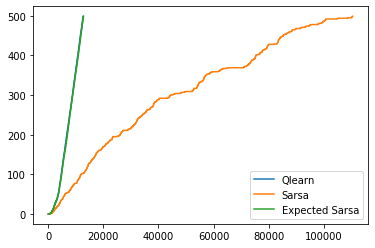

In [3]:
wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
a = Grid(w=len(wind), h=7, wind=wind)
a.actions = [0, 2, 4, 6]

b = QLearn(a, alpha=1, eps=.2)
for i in range(500):
    b.run_episode()
plt.plot(b.ep_log, label='Qlearn')

c = Sarsa(a, alpha=1, eps=.2)
for i in range(500):
    c.run_episode()
plt.plot(c.ep_log, label='Sarsa')

d = ESarsa(a, alpha=1, eps=.2)
for i in range(500):
    d.run_episode()
plt.plot(d.ep_log, label='Expected Sarsa')

plt.legend()

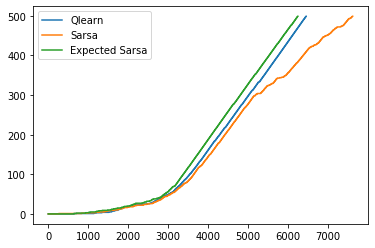

In [5]:
wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
a = Grid(w=len(wind), h=7, wind=wind)
a.actions = range(8)

b = QLearn(a, alpha=1, eps=.01)
for i in range(500):
    b.run_episode()
plt.plot(b.ep_log, label='Qlearn')

c = Sarsa(a, alpha=1, eps=.01)
for i in range(500):
    c.run_episode()
plt.plot(c.ep_log, label='Sarsa')

d = ESarsa(a, alpha=1, eps=.01)
for i in range(500):
    d.run_episode()
plt.plot(d.ep_log, label='Expected Sarsa')

plt.legend()

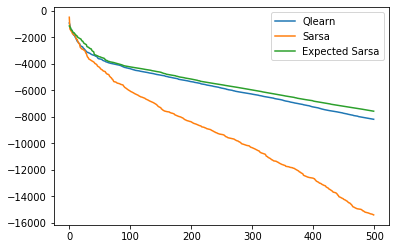

In [6]:
wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
a = Grid(w=len(wind), h=7, wind=wind)
a.actions = range(9)

b = QLearn(a, alpha=1, eps=.1)
for i in range(500):
    b.run_episode()
plt.plot(b.r_log, label='Qlearn')

c = Sarsa(a, alpha=1, eps=.1)
for i in range(500):
    c.run_episode()
plt.plot(c.r_log, label='Sarsa')

d = ESarsa(a, alpha=1, eps=.1)
for i in range(500):
    d.run_episode()
plt.plot(d.r_log, label='Expected Sarsa')

plt.legend()